In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_sal = pd.read_csv(r'C:\Users\batman\Desktop\titanic dataset\adult.csv')
df_sal

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df_sal.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

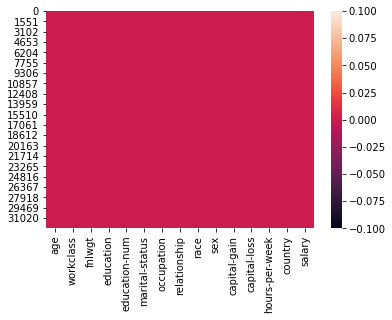

In [5]:
sns.heatmap(df_sal.isnull())

In [6]:
df_sal['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
#droppin ? from dataset
df_sal['country'] = df_sal['country'].replace(' ?',np.nan)
df_sal['workclass'] = df_sal['workclass'].replace(' ?',np.nan)
df_sal['occupation'] = df_sal['occupation'].replace(' ?',np.nan)

df_sal.dropna(how='any',inplace=True)
df_sal

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df_sal.iloc[:,-1] = le.fit_transform(df_sal.iloc[:,-1])
df_sal.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [9]:
df_sal['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [10]:
print(df_sal[['country','salary']].groupby(['country']).mean())
print(df_sal[['relationship','salary']].groupby(['relationship']).mean())
print(df_sal[['marital-status','salary']].groupby(['marital-status']).mean())
print(df_sal[['education','salary']].groupby(['education']).mean())
print(df_sal[['occupation','salary']].groupby(['occupation']).mean())
print(df_sal[['race','salary']].groupby(['race']).mean())
print(df_sal[['sex','salary']].groupby(['sex']).mean())
print(df_sal[['hours-per-week','salary']].groupby(['hours-per-week']).mean())

                               salary
country                              
 Cambodia                    0.388889
 Canada                      0.336449
 China                       0.294118
 Columbia                    0.035714
 Cuba                        0.271739
 Dominican-Republic          0.029851
 Ecuador                     0.148148
 El-Salvador                 0.090000
 England                     0.348837
 France                      0.444444
 Germany                     0.343750
 Greece                      0.275862
 Guatemala                   0.047619
 Haiti                       0.095238
 Holand-Netherlands          0.000000
 Honduras                    0.083333
 Hong                        0.315789
 Hungary                     0.230769
 India                       0.400000
 Iran                        0.428571
 Ireland                     0.208333
 Italy                       0.352941
 Jamaica                     0.125000
 Japan                       0.389831
 Laos       

In [11]:
df_sal['marital-status'] = df_sal['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df_sal['marital-status'] = df_sal['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

df_sal['marital-status'].unique()

array(['Single', 'Couple'], dtype=object)

In [12]:
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df_sal['employment_type']=df_sal.apply(f, axis=1)
df_sal['employment_type'].unique()

array(['govt', 'self_employed', 'private', 'without_pay'], dtype=object)

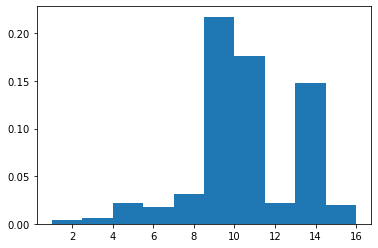

In [13]:
x_1= df_sal['education-num']
plt.hist(x_1,bins=None,density=True,histtype='bar')
plt.show()

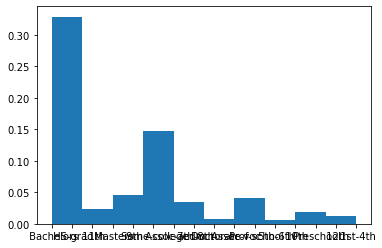

In [14]:
x_1= df_sal['education']
plt.hist(x_1,bins=None,density=True,histtype='bar')
plt.show()

In [15]:
df_sal.loc[(df_sal['capital-loss'] > 0),'capital-loss'] = 1
df_sal.loc[(df_sal['capital-loss'] == 0 ,'capital-loss')]= 0

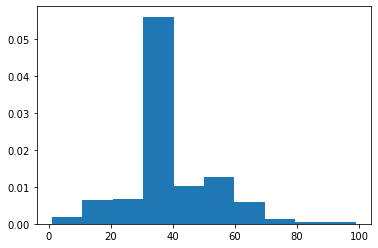

In [16]:

x_1= df_sal['hours-per-week']
plt.hist(x_1,bins=None,density=True,histtype='bar')
plt.show()

In [17]:
df_sal.loc[(df_sal['capital-gain'] > 0),'capital-gain'] = 1
df_sal.loc[(df_sal['capital-gain'] == 0 ,'capital-gain')]= 0

df_sal.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,1,0,40,United-States,0,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,self_employed
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,private
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,private
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,private
5,37,Private,284582,Masters,14,Couple,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,private
6,49,Private,160187,9th,5,Single,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0,private
7,52,Self-emp-not-inc,209642,HS-grad,9,Couple,Exec-managerial,Husband,White,Male,0,0,45,United-States,1,self_employed
8,31,Private,45781,Masters,14,Single,Prof-specialty,Not-in-family,White,Female,1,0,50,United-States,1,private
9,42,Private,159449,Bachelors,13,Couple,Exec-managerial,Husband,White,Male,1,0,40,United-States,1,private


In [18]:
df_sal.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
df_sal.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,Single,Not-in-family,White,Male,1,0,40,United-States,0,govt
1,50,83311,13,Couple,Husband,White,Male,0,0,13,United-States,0,self_employed
2,38,215646,9,Single,Not-in-family,White,Male,0,0,40,United-States,0,private
3,53,234721,7,Couple,Husband,Black,Male,0,0,40,United-States,0,private
4,28,338409,13,Couple,Wife,Black,Female,0,0,40,Cuba,0,private
5,37,284582,14,Couple,Wife,White,Female,0,0,40,United-States,0,private
6,49,160187,5,Single,Not-in-family,Black,Female,0,0,16,Jamaica,0,private
7,52,209642,9,Couple,Husband,White,Male,0,0,45,United-States,1,self_employed
8,31,45781,14,Single,Not-in-family,White,Female,1,0,50,United-States,1,private
9,42,159449,13,Couple,Husband,White,Male,1,0,40,United-States,1,private


In [19]:
df_sal.loc[:,'sex'] = le.fit_transform(df_sal.loc[:,'sex'])
df_sal.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,Single,Not-in-family,White,1,1,0,40,United-States,0,govt
1,50,83311,13,Couple,Husband,White,1,0,0,13,United-States,0,self_employed
2,38,215646,9,Single,Not-in-family,White,1,0,0,40,United-States,0,private
3,53,234721,7,Couple,Husband,Black,1,0,0,40,United-States,0,private
4,28,338409,13,Couple,Wife,Black,0,0,0,40,Cuba,0,private
5,37,284582,14,Couple,Wife,White,0,0,0,40,United-States,0,private
6,49,160187,5,Single,Not-in-family,Black,0,0,0,16,Jamaica,0,private
7,52,209642,9,Couple,Husband,White,1,0,0,45,United-States,1,self_employed
8,31,45781,14,Single,Not-in-family,White,0,1,0,50,United-States,1,private
9,42,159449,13,Couple,Husband,White,1,1,0,40,United-States,1,private


In [20]:
df_sal.loc[:,'race'] = le.fit_transform(df_sal.loc[:,'race'])
df_sal.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,Single,Not-in-family,4,1,1,0,40,United-States,0,govt
1,50,83311,13,Couple,Husband,4,1,0,0,13,United-States,0,self_employed
2,38,215646,9,Single,Not-in-family,4,1,0,0,40,United-States,0,private
3,53,234721,7,Couple,Husband,2,1,0,0,40,United-States,0,private
4,28,338409,13,Couple,Wife,2,0,0,0,40,Cuba,0,private
5,37,284582,14,Couple,Wife,4,0,0,0,40,United-States,0,private
6,49,160187,5,Single,Not-in-family,2,0,0,0,16,Jamaica,0,private
7,52,209642,9,Couple,Husband,4,1,0,0,45,United-States,1,self_employed
8,31,45781,14,Single,Not-in-family,4,0,1,0,50,United-States,1,private
9,42,159449,13,Couple,Husband,4,1,1,0,40,United-States,1,private


In [21]:
df_sal.loc[:,'marital-status'] = le.fit_transform(df_sal.loc[:,'marital-status'])
df_sal.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,Not-in-family,4,1,1,0,40,United-States,0,govt
1,50,83311,13,0,Husband,4,1,0,0,13,United-States,0,self_employed
2,38,215646,9,1,Not-in-family,4,1,0,0,40,United-States,0,private
3,53,234721,7,0,Husband,2,1,0,0,40,United-States,0,private
4,28,338409,13,0,Wife,2,0,0,0,40,Cuba,0,private
5,37,284582,14,0,Wife,4,0,0,0,40,United-States,0,private
6,49,160187,5,1,Not-in-family,2,0,0,0,16,Jamaica,0,private
7,52,209642,9,0,Husband,4,1,0,0,45,United-States,1,self_employed
8,31,45781,14,1,Not-in-family,4,0,1,0,50,United-States,1,private
9,42,159449,13,0,Husband,4,1,1,0,40,United-States,1,private


In [22]:
df_sal.country.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Haiti                            42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [23]:
df_sal.loc[df_sal['country'] != ' United-States', 'country'] = 'Non-US'
df_sal.loc[df_sal['country'] == ' United-States', 'country'] = 'US'

df_sal.country.value_counts()

US        27504
Non-US     2658
Name: country, dtype: int64

In [24]:
df_sal.loc[:,'country'] = le.fit_transform(df_sal.loc[:,'country'])
df_sal.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,Not-in-family,4,1,1,0,40,1,0,govt
1,50,83311,13,0,Husband,4,1,0,0,13,1,0,self_employed
2,38,215646,9,1,Not-in-family,4,1,0,0,40,1,0,private
3,53,234721,7,0,Husband,2,1,0,0,40,1,0,private
4,28,338409,13,0,Wife,2,0,0,0,40,0,0,private
5,37,284582,14,0,Wife,4,0,0,0,40,1,0,private
6,49,160187,5,1,Not-in-family,2,0,0,0,16,0,0,private
7,52,209642,9,0,Husband,4,1,0,0,45,1,1,self_employed
8,31,45781,14,1,Not-in-family,4,0,1,0,50,1,1,private
9,42,159449,13,0,Husband,4,1,1,0,40,1,1,private


In [25]:
df_sal.loc[:,'employment_type'] = le.fit_transform(df_sal.loc[:,'employment_type'])
df_sal.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,Not-in-family,4,1,1,0,40,1,0,0
1,50,83311,13,0,Husband,4,1,0,0,13,1,0,2
2,38,215646,9,1,Not-in-family,4,1,0,0,40,1,0,1
3,53,234721,7,0,Husband,2,1,0,0,40,1,0,1
4,28,338409,13,0,Wife,2,0,0,0,40,0,0,1
5,37,284582,14,0,Wife,4,0,0,0,40,1,0,1
6,49,160187,5,1,Not-in-family,2,0,0,0,16,0,0,1
7,52,209642,9,0,Husband,4,1,0,0,45,1,1,2
8,31,45781,14,1,Not-in-family,4,0,1,0,50,1,1,1
9,42,159449,13,0,Husband,4,1,1,0,40,1,1,1


In [26]:
df_sal.loc[:,'race'] = le.fit_transform(df_sal.loc[:,'race'])
df_sal.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,Not-in-family,4,1,1,0,40,1,0,0
1,50,83311,13,0,Husband,4,1,0,0,13,1,0,2
2,38,215646,9,1,Not-in-family,4,1,0,0,40,1,0,1
3,53,234721,7,0,Husband,2,1,0,0,40,1,0,1
4,28,338409,13,0,Wife,2,0,0,0,40,0,0,1
5,37,284582,14,0,Wife,4,0,0,0,40,1,0,1
6,49,160187,5,1,Not-in-family,2,0,0,0,16,0,0,1
7,52,209642,9,0,Husband,4,1,0,0,45,1,1,2
8,31,45781,14,1,Not-in-family,4,0,1,0,50,1,1,1
9,42,159449,13,0,Husband,4,1,1,0,40,1,1,1


In [27]:
df_sal.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: relationship, dtype: int64

In [28]:
df_sal.drop(columns='relationship',axis=1,inplace=True)
df_sal.head()

,age,fnlwgt,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,4,1,1,0,40,1,0,0
1,50,83311,13,0,4,1,0,0,13,1,0,2
2,38,215646,9,1,4,1,0,0,40,1,0,1
3,53,234721,7,0,2,1,0,0,40,1,0,1
4,28,338409,13,0,2,0,0,0,40,0,0,1


In [29]:
#whole df converted in numbers
df_sal.fnlwgt.value_counts()

203488    13
113364    12
164190    12
123011    12
148995    12
          ..
34393      1
288341     1
239415     1
118352     1
229376     1
Name: fnlwgt, Length: 20263, dtype: int64

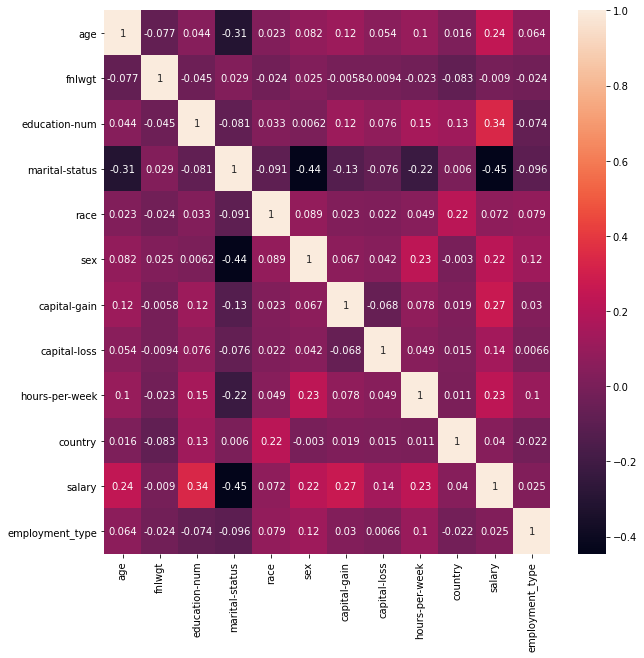

In [55]:
#check outlier,correlation,skewness,scaling and divide x and y
hmap_corr = df_sal.corr()
plt.figure(figsize = (10,10))
sns.heatmap(hmap_corr,annot=True)
plt.show()

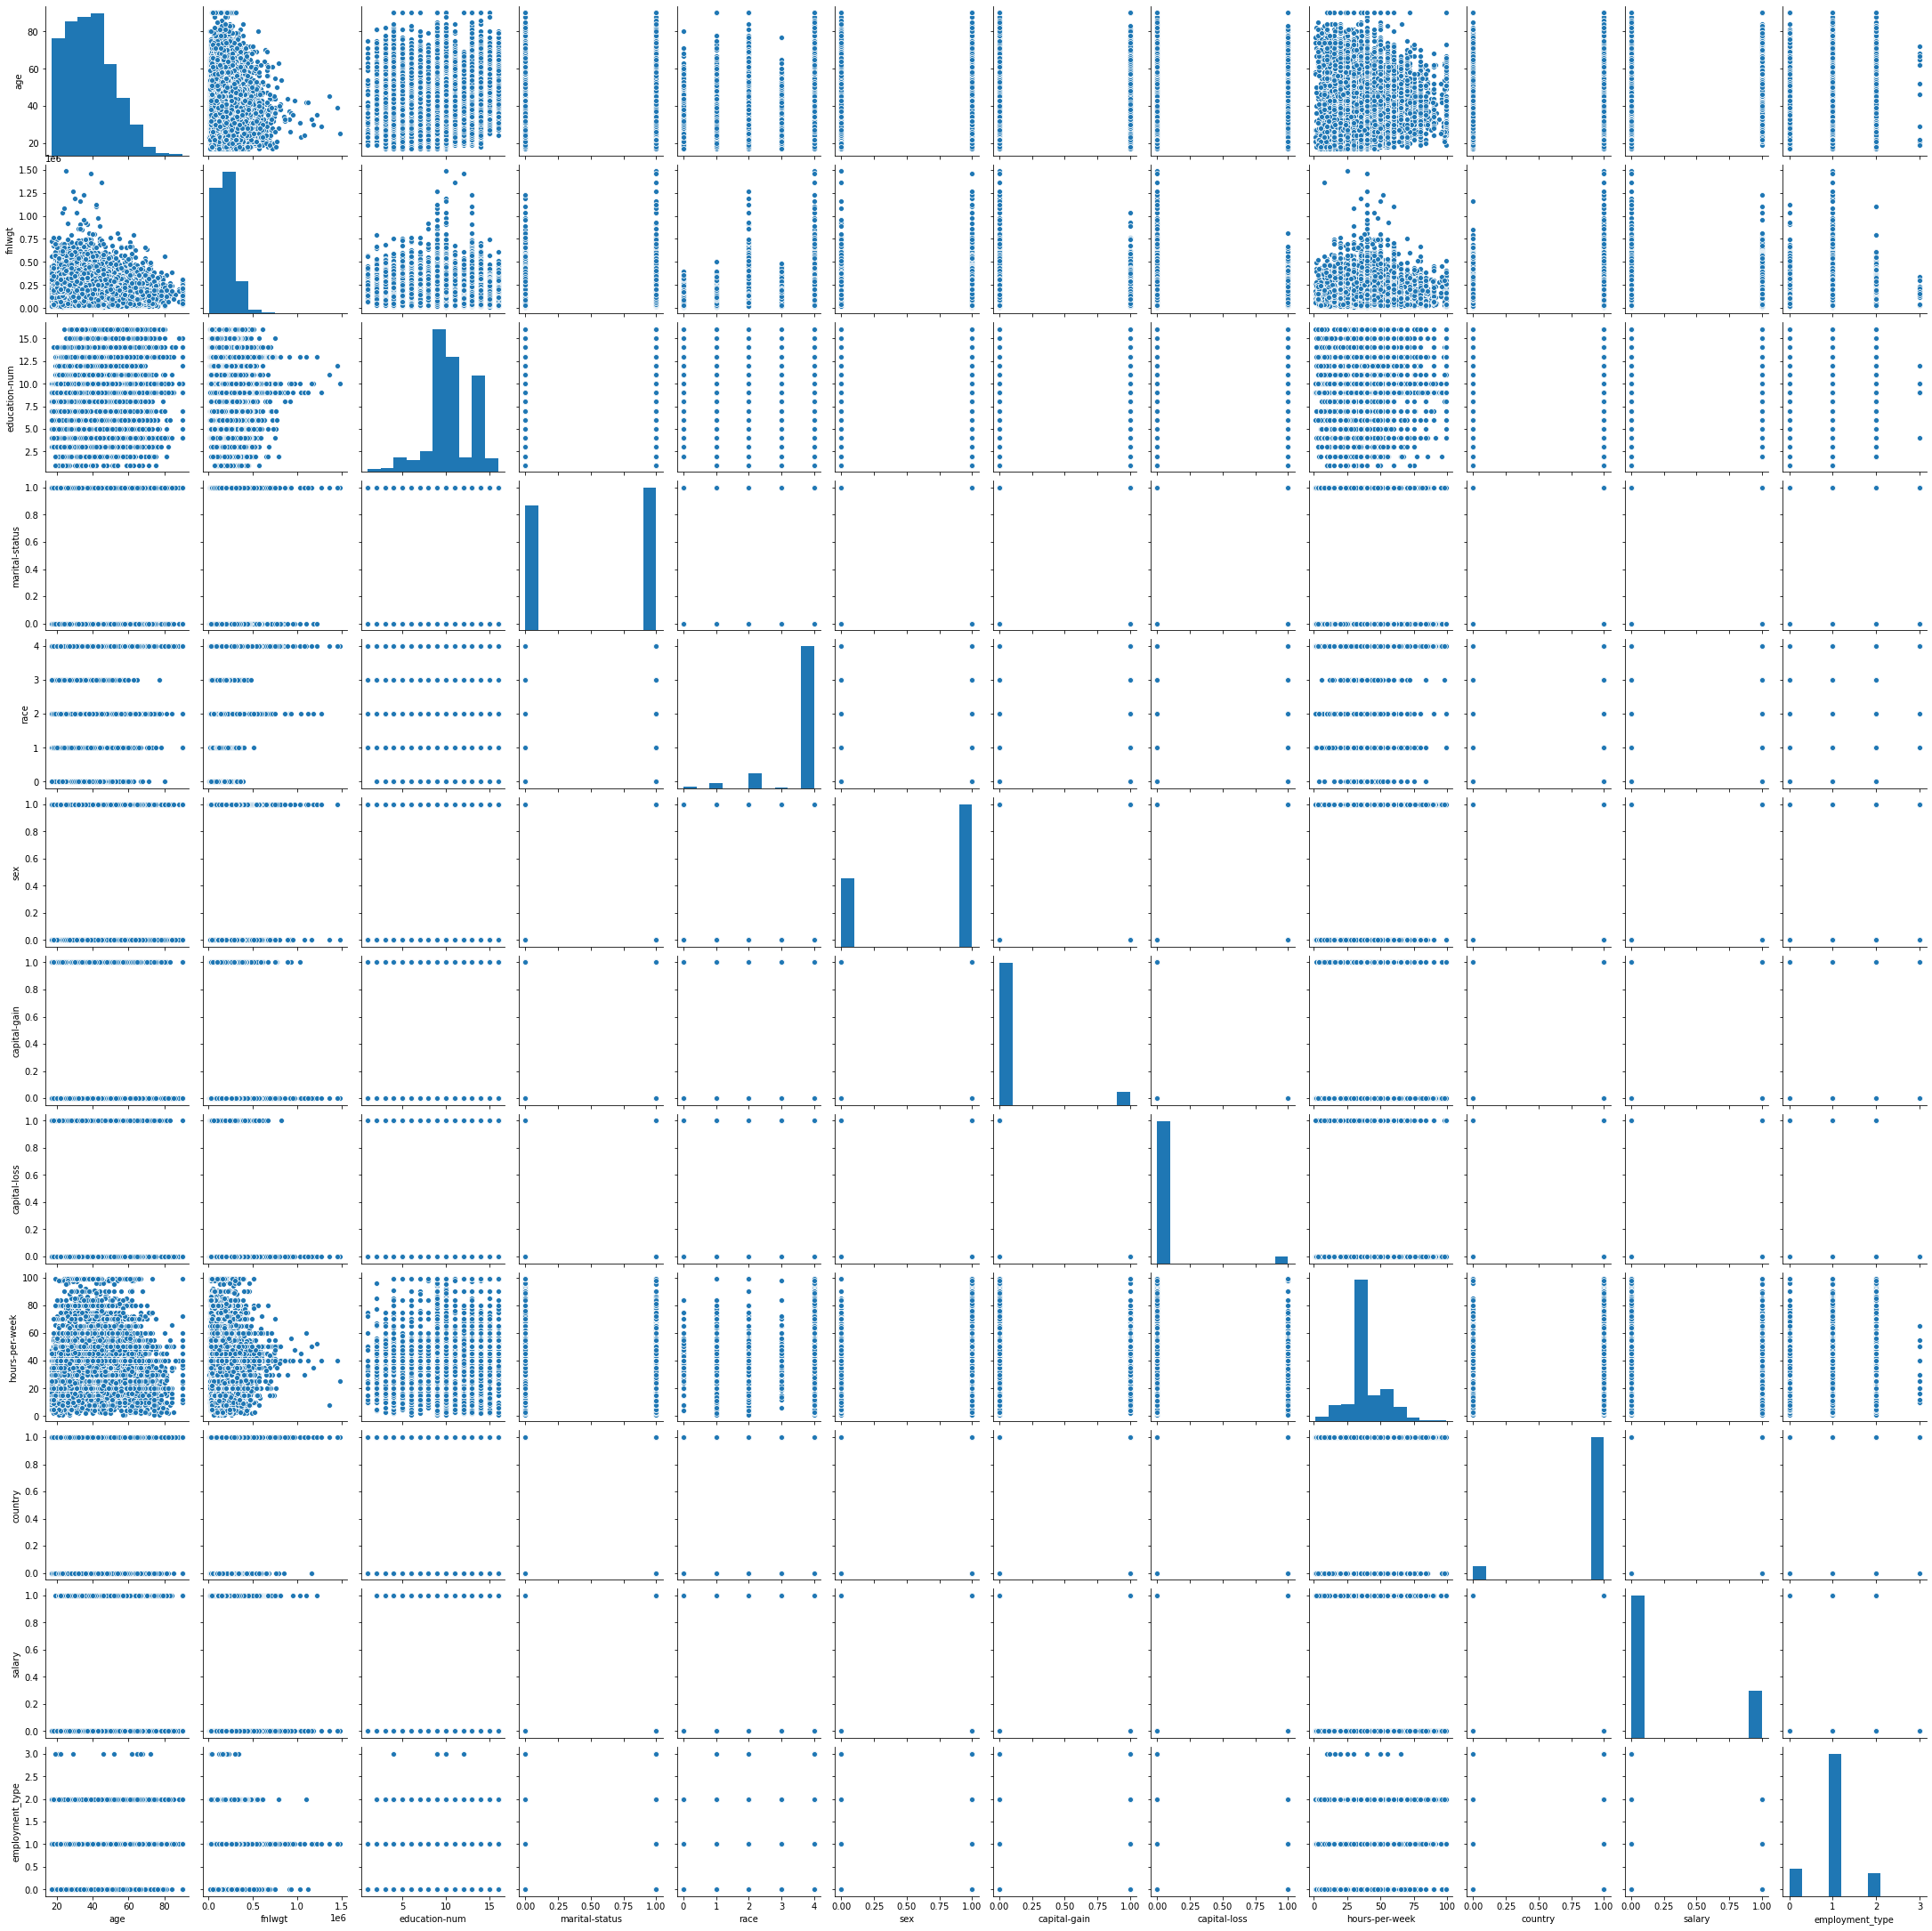

In [56]:
sns.pairplot(df_sal)

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(df_sal))
z

array([[0.04279571, 1.0627216 , 1.12891838, ..., 0.31087053, 0.57569132,
        1.90911493],
       [0.88028814, 1.00787131, 1.12891838, ..., 0.31087053, 0.57569132,
        1.99824237],
       [0.03333996, 0.24469349, 0.4397382 , ..., 0.31087053, 0.57569132,
        0.04456372],
       ...,
       [1.48937355, 0.3585745 , 0.4397382 , ..., 0.31087053, 0.57569132,
        0.04456372],
       [1.25151078, 0.11070545, 0.4397382 , ..., 0.31087053, 0.57569132,
        0.04456372],
       [1.0325595 , 0.92884082, 0.4397382 , ..., 0.31087053, 1.73704199,
        1.99824237]])

In [32]:
np.where(z>3)

(array([    0,     4,     6, ..., 30154, 30154, 30161], dtype=int64),
 array([6, 9, 9, ..., 4, 9, 6], dtype=int64))

In [33]:
df_new = df_sal[(z<3).all(axis=1)]
df_new

,age,fnlwgt,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
1,50,83311,13,0,4,1,0,0,13,1,0,2
2,38,215646,9,1,4,1,0,0,40,1,0,1
3,53,234721,7,0,2,1,0,0,40,1,0,1
5,37,284582,14,0,4,0,0,0,40,1,0,1
7,52,209642,9,0,4,1,0,0,45,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,310152,10,1,4,1,0,0,40,1,0,1
32556,27,257302,12,0,4,0,0,0,38,1,0,1
32557,40,154374,9,0,4,1,0,0,40,1,1,1
32558,58,151910,9,1,4,0,0,0,40,1,0,1


age                   AxesSubplot(0.125,0.772143;0.352273x0.107857)
fnlwgt             AxesSubplot(0.547727,0.772143;0.352273x0.107857)
education-num         AxesSubplot(0.125,0.642714;0.352273x0.107857)
marital-status     AxesSubplot(0.547727,0.642714;0.352273x0.107857)
race                  AxesSubplot(0.125,0.513286;0.352273x0.107857)
sex                AxesSubplot(0.547727,0.513286;0.352273x0.107857)
capital-gain          AxesSubplot(0.125,0.383857;0.352273x0.107857)
capital-loss       AxesSubplot(0.547727,0.383857;0.352273x0.107857)
hours-per-week        AxesSubplot(0.125,0.254429;0.352273x0.107857)
country            AxesSubplot(0.547727,0.254429;0.352273x0.107857)
salary                   AxesSubplot(0.125,0.125;0.352273x0.107857)
employment_type       AxesSubplot(0.547727,0.125;0.352273x0.107857)
dtype: object

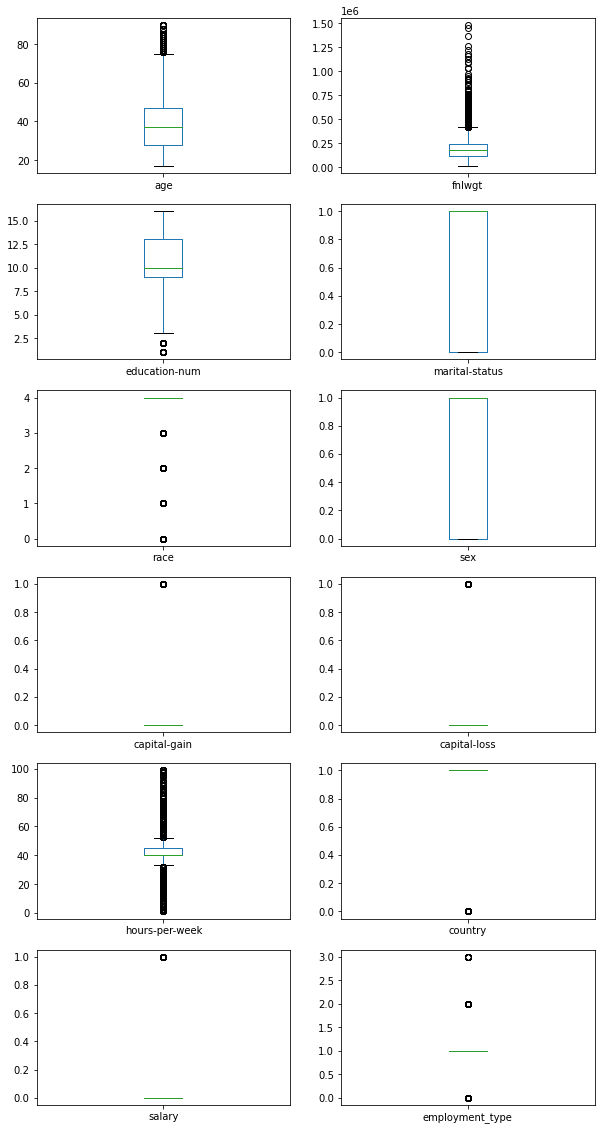

In [34]:
df_sal.plot(kind='box',subplots=True,figsize=(10,20),layout=(6,2))

age                   AxesSubplot(0.125,0.772143;0.352273x0.107857)
fnlwgt             AxesSubplot(0.547727,0.772143;0.352273x0.107857)
education-num         AxesSubplot(0.125,0.642714;0.352273x0.107857)
marital-status     AxesSubplot(0.547727,0.642714;0.352273x0.107857)
race                  AxesSubplot(0.125,0.513286;0.352273x0.107857)
sex                AxesSubplot(0.547727,0.513286;0.352273x0.107857)
capital-gain          AxesSubplot(0.125,0.383857;0.352273x0.107857)
capital-loss       AxesSubplot(0.547727,0.383857;0.352273x0.107857)
hours-per-week        AxesSubplot(0.125,0.254429;0.352273x0.107857)
country            AxesSubplot(0.547727,0.254429;0.352273x0.107857)
salary                   AxesSubplot(0.125,0.125;0.352273x0.107857)
employment_type       AxesSubplot(0.547727,0.125;0.352273x0.107857)
dtype: object

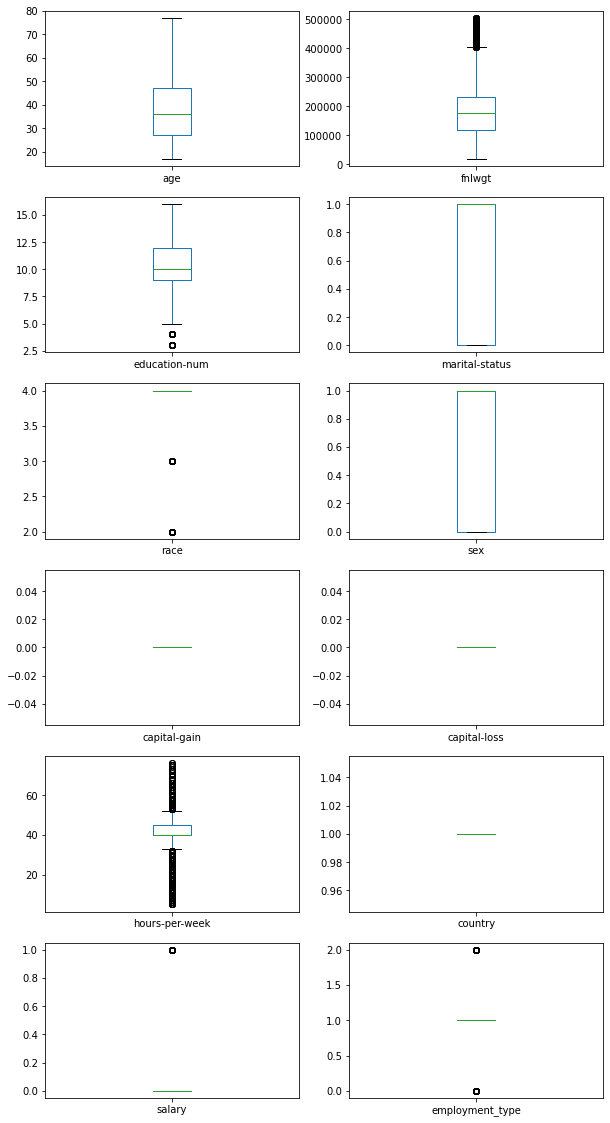

In [35]:
df_new.plot(kind='box',subplots=True,figsize=(10,20),layout=(6,2))

In [36]:
df_new.skew()

age                0.458357
fnlwgt             0.626840
education-num     -0.004416
marital-status    -0.255883
race              -2.620685
sex               -0.673971
capital-gain       0.000000
capital-loss       0.000000
hours-per-week    -0.295412
country            0.000000
salary             1.478398
employment_type   -0.065793
dtype: float64

In [37]:
from scipy.stats import boxcox

#for col in df_new.columns:
   # if df_new.skew().loc[col] > 0.55:
        #df_new[col] = np.log1p(df_new[col])

In [38]:
df_new.skew()

age                0.458357
fnlwgt             0.626840
education-num     -0.004416
marital-status    -0.255883
race              -2.620685
sex               -0.673971
capital-gain       0.000000
capital-loss       0.000000
hours-per-week    -0.295412
country            0.000000
salary             1.478398
employment_type   -0.065793
dtype: float64

In [39]:
df_new['salary'].value_counts()

0    18055
1     4593
Name: salary, dtype: int64

In [40]:
df_new['education-num'].value_counts()

9     7848
10    5323
13    3604
14    1055
11    1012
7      858
12     778
6      660
4      364
5      310
8      289
15     288
16     198
3       61
Name: education-num, dtype: int64

In [41]:
x = df_new.drop(columns= 'salary')
x

,age,fnlwgt,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,country,employment_type
1,50,83311,13,0,4,1,0,0,13,1,2
2,38,215646,9,1,4,1,0,0,40,1,1
3,53,234721,7,0,2,1,0,0,40,1,1
5,37,284582,14,0,4,0,0,0,40,1,1
7,52,209642,9,0,4,1,0,0,45,1,2
...,...,...,...,...,...,...,...,...,...,...,...
32555,22,310152,10,1,4,1,0,0,40,1,1
32556,27,257302,12,0,4,0,0,0,38,1,1
32557,40,154374,9,0,4,1,0,0,40,1,1
32558,58,151910,9,1,4,0,0,0,40,1,1


In [42]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_x = sc.fit_transform(x)
df_x = pd.DataFrame(df_x)
df_x

,0,1,2,3,4,5,6,7,8,9,10
0,0.959024,-1.074578,1.263948,-1.136083,0.340119,0.718283,0.0,0.0,-2.502451,0.0,2.059001
1,0.026773,0.334151,-0.483745,0.880217,0.340119,0.718283,0.0,0.0,-0.017289,0.0,0.068806
2,1.192087,0.537208,-1.357591,-1.136083,-2.977290,0.718283,0.0,0.0,-0.017289,0.0,0.068806
3,-0.050915,1.067987,1.700871,-1.136083,0.340119,-1.392209,0.0,0.0,-0.017289,0.0,0.068806
4,1.114400,0.270237,-0.483745,-1.136083,0.340119,0.718283,0.0,0.0,0.442927,0.0,2.059001
...,...,...,...,...,...,...,...,...,...,...,...
22643,-1.216229,1.340184,-0.046821,0.880217,0.340119,0.718283,0.0,0.0,-0.017289,0.0,0.068806
22644,-0.827791,0.777586,0.827025,-1.136083,0.340119,-1.392209,0.0,0.0,-0.201375,0.0,0.068806
22645,0.182148,-0.318100,-0.483745,-1.136083,0.340119,0.718283,0.0,0.0,-0.017289,0.0,0.068806
22646,1.580525,-0.344330,-0.483745,0.880217,0.340119,-1.392209,0.0,0.0,-0.017289,0.0,0.068806


In [43]:
y = df_new.loc[:,'salary']
y

1        0
2        0
3        0
5        0
7        1
        ..
32555    0
32556    0
32557    1
32558    0
32559    0
Name: salary, Length: 22648, dtype: int32

In [44]:
def best_parameter(model,para):
    from sklearn.model_selection import GridSearchCV
    
    grd = GridSearchCV(model,para,cv=10,scoring='accuracy')
    grd.fit(df_x,y)
    return [grd.best_params_, grd.best_score_]

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [46]:
#RFC
rfc = RandomForestClassifier()
para ={
    'n_estimators':list(range(2,20,2)),
    'criterion':['gini','entropy']
}
best_parameter(rfc,para)

[{'criterion': 'entropy', 'n_estimators': 18}, 0.8226773804787868]

In [47]:
#DECISION TREE
dtc = DecisionTreeClassifier()
para ={
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}
best_parameter(dtc,para)

[{'criterion': 'gini', 'splitter': 'best'}, 0.7904449917706067]

In [48]:
#Logistics Regression
lg = LogisticRegression()
cv_s = cross_val_score(lg,df_x,y,scoring='accuracy',cv=10)
cv_s.mean()

0.8358354589349369

In [50]:
#KNN
knn =KNeighborsClassifier()
para ={
    'n_neighbors':list(range(3,17,2)),
    'weights':['uniform','distance']
}
best_parameter(knn,para)

[{'n_neighbors': 15, 'weights': 'uniform'}, 0.832303177091865]

In [57]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier()
para = {
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':list(range(50,1060,100))
}
best_parameter(gbc,para)

[{'learning_rate': 0.01, 'n_estimators': 1050}, 0.8441802588163714]

In [58]:
#Best Accuracy is acieved by Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate = 0.01,n_estimators=1050)
cv_score = cross_val_score(gbc,df_x,y,cv=10,scoring='accuracy')
cv_score.mean()

0.8441802588163714